In [1]:
%run convention.ipynb

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Grid Search

In [28]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
iris = load_iris()
grid_params = {
    'C' : [.001, .01, .1, 1, 10, 100],
    'gamma' : [.01, .1, 1, 10, 100 , 1000]
}
grid = GridSearchCV(SVC(), grid_params, cv = 5)
grid.fit(iris.data, iris.target)
print('Best param', grid.best_params_)
print('Best score', grid.best_score_)
grid.best_estimator_

Best param {'C': 1, 'gamma': 0.1}
Best score 0.98


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Grid search with cross_validation

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


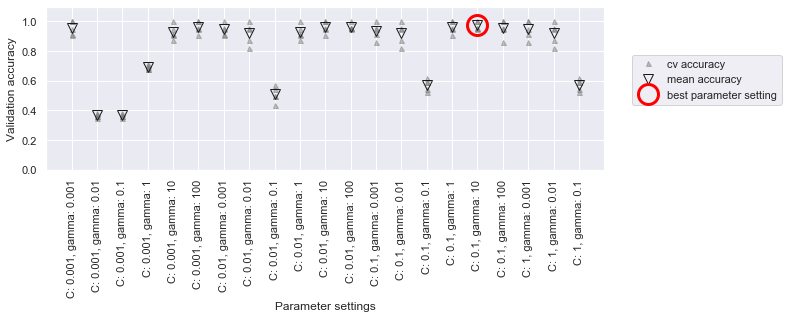

In [7]:
mglearn.plots.plot_cross_val_selection()

# Analyzing the result of cross-validation

<p class = 'note'>It is often helpful to visualize the results of cross-validation, to understand how the
model generalization depends on the parameters we are searching. As grid searches
are quite computationally expensive to run, often it is a good idea to start with a rela‐
tively coarse and small grid. We can then inspect the results of the cross-validated
grid search, and possibly expand our search. </p>

<h3 class = 'highlight'>Get the result of grid search: <code>Grid.cv_results_</code></h3>

In [29]:
report = pd.DataFrame(grid.cv_results_)
report

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000997,6.301482e-04,0.000399,0.000489,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.866667,0.966667,0.833333,0.966667,0.933333,0.913333,0.054160,17
1,0.000989,6.200930e-04,0.000207,0.000414,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.900000,0.933333,0.866667,0.933333,0.933333,0.913333,0.026667,17
2,0.000399,4.888113e-04,0.000399,0.000489,0.001,1,"{'C': 0.001, 'gamma': 1}",0.933333,0.966667,0.966667,0.933333,1.000000,0.960000,0.024944,7
3,0.000997,6.281224e-04,0.000205,0.000409,0.001,10,"{'C': 0.001, 'gamma': 10}",0.766667,0.700000,0.700000,0.833333,0.833333,0.766667,0.059628,22
4,0.001000,1.675769e-05,0.000392,0.000481,0.001,100,"{'C': 0.001, 'gamma': 100}",0.633333,0.433333,0.433333,0.433333,0.366667,0.460000,0.090431,28
5,0.001190,3.923306e-04,0.000201,0.000401,0.001,1000,"{'C': 0.001, 'gamma': 1000}",0.466667,0.400000,0.333333,0.400000,0.400000,0.400000,0.042164,31
6,0.000799,3.994025e-04,0.000199,0.000398,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.866667,0.966667,0.833333,0.966667,0.933333,0.913333,0.054160,17
7,0.000598,4.886169e-04,0.000200,0.000400,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.900000,0.933333,0.866667,0.933333,0.933333,0.913333,0.026667,17
8,0.000998,1.945122e-06,0.000199,0.000397,0.01,1,"{'C': 0.01, 'gamma': 1}",0.933333,0.966667,0.966667,0.933333,1.000000,0.960000,0.024944,7
9,0.000599,4.893184e-04,0.000199,0.000398,0.01,10,"{'C': 0.01, 'gamma': 10}",0.766667,0.700000,0.700000,0.833333,0.833333,0.766667,0.059628,22


In [37]:
def plot_report(report):
    score = report['mean_test_score'].to_numpy().reshape((6, 6))
    mglearn.tools.heatmap(score, xticklabels = grid_params['gamma'], yticklabels = grid_params['C'], ylabel = 'C', xlabel = 'gamma')

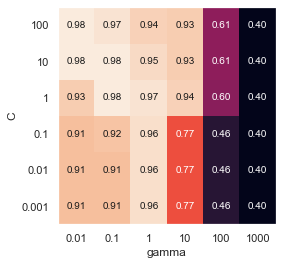

In [38]:
plot_report(report)

<span class = 'warning'>Anaysis</span>

<ul class = 'note'>
<li>First, the parameters we adjusted are very important for obtaining good performance. Both parameters
(C and gamma) matter a lot, as adjusting them can change the accuracy from 40% to
96%</li>
<li>The ranges we picked for the parameters are ranges in which we
see significant changes in the outcome</li>
<li>It’s also important to note that the ranges for
the parameters are large enough: the optimum values for each parameter are not on
the edges of the plot.</li>
</ul>

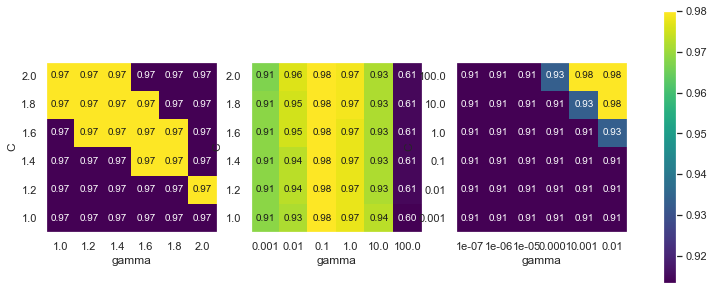

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6),
 'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),
 'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6),
 'gamma': np.logspace(-7, -2, 6)}
for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
 param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(iris.data, iris.target)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
    scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
    yticklabels=param_grid['C'], cmap="viridis", ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())

The figure above shows some examples with improper range value of <b>gamma</b> and <b>C</b>

<span class = 'note'>Analysis</span><br>
The first panel shows no changes at all, with a constant color over the whole parame‐
ter grid. In this case, this is caused by improper scaling and range of the parameters C
and gamma. However, if no change in accuracy is visible over the different parameter
settings, it could also be that a parameter is just not important at all. It is usually good
to try very extreme values first, to see if there are any changes in the accuracy as a
result of changing a parameter.


The second panel shows a vertical stripe pattern. This indicates that only the setting
of the gamma parameter makes any difference. This could mean that the gamma param‐
eter is searching over interesting values but the C parameter is not—or it could mean
the C parameter is not important.


The third panel shows changes in both C and gamma. However, we can see that in the
entire bottom left of the plot, nothing interesting is happening. We can probably
exclude the very small values from future grid searches. The optimum parameter set‐
ting is at the top right. As the optimum is in the border of the plot, we can expect that
there might be even better values beyond this border, and we might want to change
our search range to include more parameters in this region.



# Search over a space that is not grid

<h3 class = 'note'>Solution: use a list of <code>param_grid</code>, where each <code>param_grid</code> is a <code>Dict</code></h3>

In [46]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target
params = [
    {
        'kernel' : ['rbf'],
        'gamma' : [.1, 1, 10],
        'C' : [.1, 1, 10]
    },
    {
        'kernel' : ['poly'],
        'degree' : [2,3,4],
        'gamma' : [.1, 1, 10]
    }
]

grid = GridSearchCV(SVC(), params, cv = 5)
grid.fit(X, y)
grid.best_params_

{'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}

In [47]:
grid.best_score_

0.9699499165275459